In [1]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'; 
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn import metrics as skmetrics
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.utils.vis_utils import plot_model
from sklearn.ensemble import RandomForestClassifier
import h5py
from tables import *
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load Dataset

In [2]:
train_filename='dataset_training_new.csv'
df=pd.read_csv(train_filename, nrows=9003, header=0,comment='#', na_values=[""])


In [3]:
# Data preparation
X_train = df.drop(['target'], axis = 1).values
y_train = df['target'].values

print("Input shape (X_train): {} --- Output shape (y_train): {}".format(X_train.shape, y_train.shape))

Input shape (X_train): (9001, 4) --- Output shape (y_train): (9001,)


# GridSearch

In [4]:
hyperparameter_space = {'max_depth':[5,10,15],
                        'min_sample_leaf':[5,10,15],
                        'min_sample_split':[5,10,15],
                        'n_estimators':[50,100,150]}

In [9]:
rs = GridSearchCV( estimator=RandomForestClassifier,param_grid= hyperparameter_space)

In [10]:
rs.fit(X_train,y_train)

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

*Model definition and compile*

In [29]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)


# Build Starting Network

In [30]:
rf_model.fit(X_train, y_train)

c:\Users\madda\Desktop\GUI\venv_new\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=50, random_state=44)

In [31]:
train_filename='dataset_test.csv'
df_test=pd.read_csv(train_filename, nrows=3117, header=0,comment='#', na_values=[""])

In [32]:
# Data preparation
X_test = df_test.drop(['target'], axis = 1).values
y_test = df_test['target'].values

print("Input shape (X): {} --- Output shape (y): {}".format(X.shape, y.shape))

Input shape (X): (12000, 4) --- Output shape (y): (12000,)


In [33]:
predictions = rf_model.predict(X_test)
predictions

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [34]:
CM=confusion_matrix(y_test,predictions)

In [36]:
cm_df = pd.DataFrame(confusion_matrix(y_test,predictions),
                     index = ['0','1','2'], 
                     columns =['0','1','2'])

Text(33.22222222222222, 0.5, 'Actal\xa0Values')

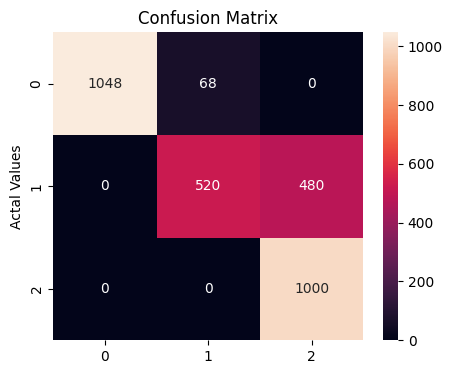

In [37]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4),)
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')